# Titanic Data Analysis
in this project i work on Titanic data and try to figure out questions like what factor made people more likely to survive and others 

## Reading data 

In [1]:
import unicodecsv
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
path = 'C:\\Users\\aemra\\Documents\\Python\\Nanodegree\\Project 2'
os.chdir(path)

Importing the modules

In [2]:
titanic_df=pd.read_csv('train.csv')
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_df.describe()

C:\Users\aemra\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


***
some datas from age column are missing.

we will work on them later.
***

In [4]:
numeric_variables=list(titanic_df.dtypes[titanic_df.dtypes!='object'].index)
titanic_df[numeric_variables].head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


## What factor made people more likely to survive?

this is very general question, but we will work on the questions that will also answer this question but more spesific questions. Such as:

    * is gender a factor that effects geting the lifeboat?
    * is there any relationship between fare and age?
    * is there any relationship between age, sex and surviving?

In [5]:
#Standarilizng the data Fare
def standardize_colum(column):
    return (column-column.mean())/column.std()

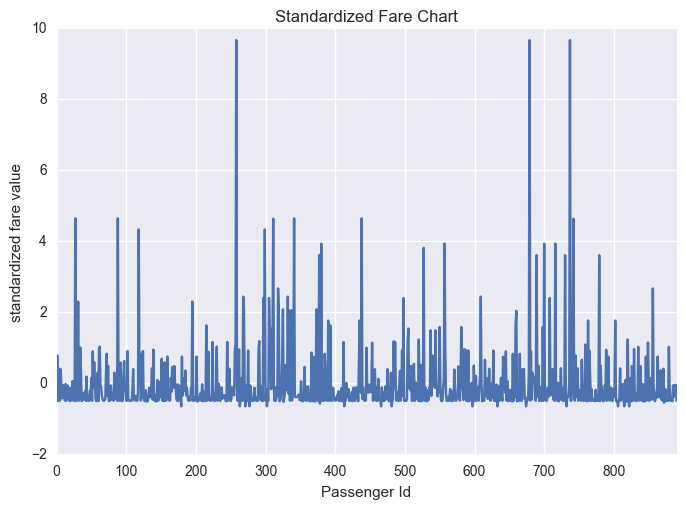

In [6]:
standardize_colum(titanic_df['Fare']).plot()
plt.title("Standardized Fare Chart")
plt.xlabel("Passenger Id")
plt.ylabel("standardized fare value")
plt.show()


### is Age and Gender effect on Survive?

C:\Users\aemra\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


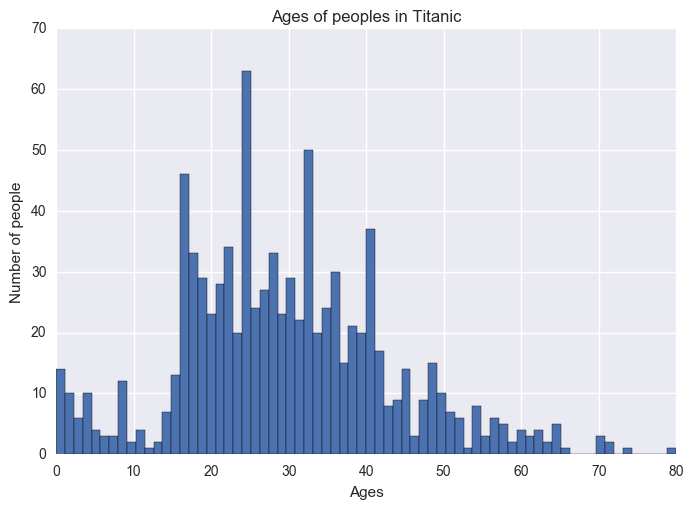

In [7]:
average_age_titanic    =titanic_df['Age'].mean()
std_age_titanic        =titanic_df['Age'].std()
count_nan_age_titanic  =titanic_df['Age'].isnull().sum()

rand_1=np.random.randint(average_age_titanic-std_age_titanic,average_age_titanic+std_age_titanic, size=count_nan_age_titanic)
# plot original Age values
# fill NaN values in Age column with random values generated
titanic_df["Age"][np.isnan(titanic_df["Age"])] = rand_1
#convert them to int
titanic_df['Age']=titanic_df['Age'].astype(int)

titanic_df['Age'].hist(bins=70)
plt.title('Ages of peoples in Titanic')
plt.xlabel('Ages')
plt.ylabel('Number of people')
plt.show()

***
In this step:
there are 177 data on Age column missing. So that this missing values are narrowing our reduces statistical power. So that we fill the missing values with the random values that one std above and belowe the mean of age column. 
***

C:\Users\aemra\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


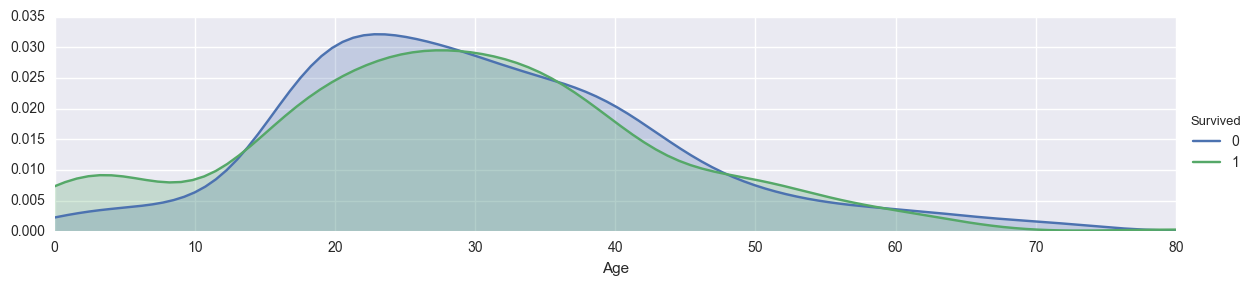

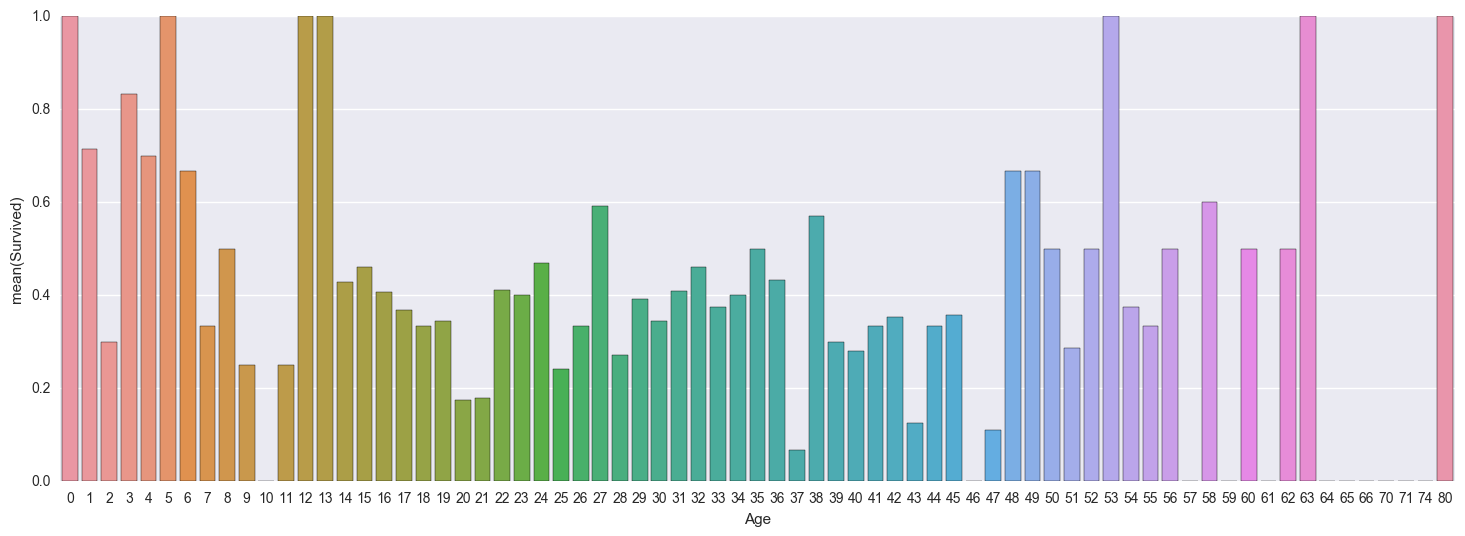

In [8]:
facet = sns.FacetGrid(titanic_df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, titanic_df['Age'].max()))
facet.add_legend()
fig, axis1 = plt.subplots(1,1,figsize=(18,6))
average_age = titanic_df[["Age", "Survived"]].groupby(['Age'],as_index=False).mean()
sns.barplot(x='Age', y='Survived', data=average_age)
plt.show()

***
we make this chars to see if the childs resqued first. First chart show is standarilized age and survived chart. according to this we can say that there are more people who survive that ones who died under 15 years olds. also on chart 2 mean of people per age is closer than one on under 15 years olds than ones age more than 15.
***

## Sex and Survive realation

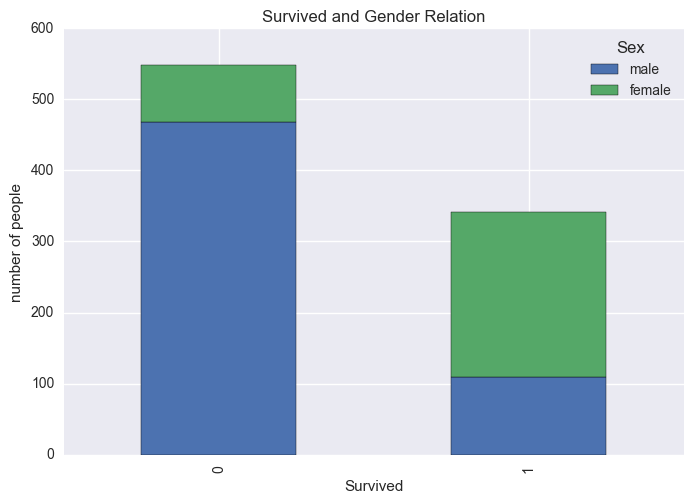

In [9]:
df1=(titanic_df.groupby(['Survived', 'Sex'])).count().unstack('Sex')['PassengerId']
df1[['male', 'female']].plot(kind='bar', stacked=True)
labels=['Died', 'Survived']

plt.title("Survived and Gender Relation")
plt.ylabel("number of people")
plt.show()

***

as we can see most of the people who survive is females but this is not enough to make comment on this part of data

***



In [10]:
total_gender=titanic_df.groupby('Sex').size()
port_class_groups=titanic_df.groupby(['Sex'], as_index=False).get_group('female')
famele_survive=port_class_groups.groupby('Survived').count()*100/port_class_groups.count()

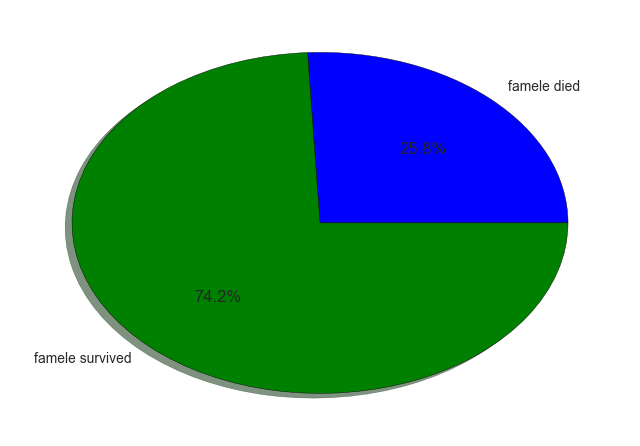

In [11]:
labels='famele died','famele survived'
values=famele_survive["Age"]
plt.pie(values, labels=labels,autopct='%1.1f%%', shadow=True)
plt.show()

***
I calculate the persentage of surviving of olverall fameles. 74.2% of famele survived from the titanic disester. this chart support the point that "women more likely to survive" 
***

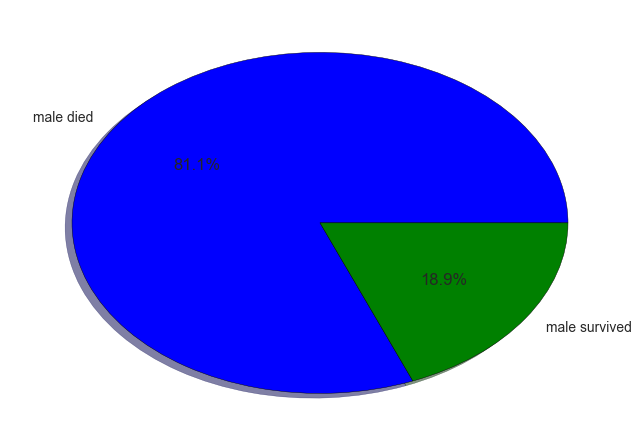

In [12]:
total_gender=titanic_df.groupby('Sex').size()
port_class_groups=titanic_df.groupby(['Sex'], as_index=False).get_group('male')
famele_survive=port_class_groups.groupby('Survived').count()*100/port_class_groups.count()
labels='male died','male survived'
values=famele_survive["Age"]
plt.pie(values, labels=labels,autopct='%1.1f%%', shadow=True)
plt.show()

***
form this data we can say that more than %75 of the female population has survived but %79.5 of males are died so;
usualy womans and childs are being resqued first in this kind a stuation.
***

###     
### Was Class differences another factor to Survived?

In [13]:
df2 =titanic_df.groupby(['Survived', 'Pclass'])['PassengerId'].count().unstack('Survived').fillna(0)
df2

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


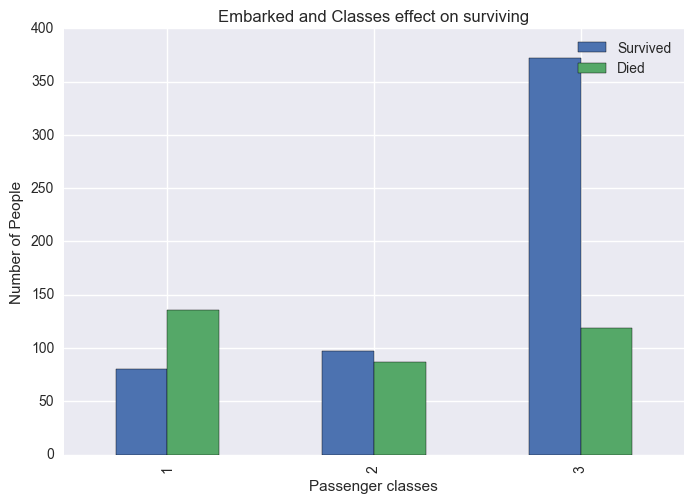

In [14]:
df2[[0, 1]].plot(kind='bar', stacked=False)
plt.title('Embarked and Classes effect on surviving')
plt.ylabel('Number of People')
plt.xlabel("Passenger classes")
plt.legend(['Survived', 'Died'])
plt.show()

***
this chart show us in first class people more likely to be alive.
***

### I also want to check fare and age

In [15]:
def correlation(x,y):
    std_x=(x-x.mean())/x.std(ddof=0)
    std_y=(y-y.mean())/y.std(ddof=0)
    return (std_x*std_y).mean()

In [16]:
tdf=titanic_df.dropna(subset=['Age'])

In [17]:
correlation(tdf['Age'],tdf['Fare'])

0.09188736389098015

# Summary



as a sumary we have been working on a titanic disaster. for this data set i prepere some questions. Such as :
    * is gender a factor that effects geting the lifeboat?
    * is there any relationship between fare and age?
    * is there any relationship between age, sex and surviving?

we can come up with many other question. Because our dataset is capabile of. but we have some mising values on our data. for example there is a lot of data is mising in that column. it reduces statistical power. but there is always way, we cannot find the exect values but we can simly fill them with random values. I basicaly fill them random values that 1 std above and 1 std belove the mean. so they will be in %65 of data area. 
In kagels web page, it says 'some groups of people were more likely to survive than others, such as women, children, and the upper-class.' so I check if this is true. if ones looks at in a gender aproch they one can say women more likely to survive. So next steps should be age effects on surviving, according to our diagram, people who are under 15, there are more alive people that dead. on the other hand, upper classes again according to diagrams, more likely to survive. I also chekc the correlation of fare and age. but correlation doesn't imply causation. so there might not be a relationship. 